#importing basic libraries

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules 

#read dataset

In [ ]:
movie=pd.read_csv("my_movies.csv")
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [ ]:
movie.shape

(10, 15)

In [ ]:
movie.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [ ]:
movie.count()

V1               10
V2               10
V3                7
V4                2
V5                1
Sixth Sense      10
Gladiator        10
LOTR1            10
Harry Potter1    10
Patriot          10
LOTR2            10
Harry Potter2    10
LOTR             10
Braveheart       10
Green Mile       10
dtype: int64

In [ ]:
movie.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [ ]:
movie_1=movie.iloc[:,5:]
movie_1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [ ]:
movie_1.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
movie_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [ ]:
movie_2=movie_1.corr()
movie_2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.356348,-0.102062,-0.102062,0.166667,-0.102062,-0.408248,0.272166,-0.408248,0.408248
Gladiator,0.356348,1.000000,-0.763763,-0.763763,0.801784,-0.763763,-0.509175,0.218218,0.218218,-0.218218
LOTR1,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter1,-0.102062,-0.763763,0.375000,1.000000,-0.612372,0.375000,0.666667,-0.166667,-0.166667,0.375000
Patriot,0.166667,0.801784,-0.612372,-0.612372,1.000000,-0.612372,-0.408248,-0.408248,0.272166,-0.612372
LOTR2,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter2,-0.408248,-0.509175,-0.166667,0.666667,-0.408248,-0.166667,1.000000,-0.111111,-0.111111,-0.166667
LOTR,0.272166,0.218218,-0.166667,-0.166667,-0.408248,-0.166667,-0.111111,1.000000,-0.111111,0.666667
Braveheart,-0.408248,0.218218,-0.166667,-0.166667,0.272166,-0.166667,-0.111111,-0.111111,1.000000,-0.166667
Green Mile,0.408248,-0.218218,0.375000,0.375000,-0.612372,0.375000,-0.166667,0.666667,-0.166667,1.000000


#apriori algorithm

In [ ]:
frequent_items=apriori(movie_1,min_support=0.1,use_colnames=True)
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [ ]:
frequent_items_1=apriori(movie_1,min_support=0.3,use_colnames=True)
frequent_items_1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Gladiator, Sixth Sense, Patriot)"


In [ ]:
frequent_items_2=apriori(movie_1,min_support=0.5,use_colnames=True)
frequent_items_2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.6,"(Gladiator, Patriot)"


In [ ]:
rules_1=association_rules(frequent_items,metric='lift',min_threshold=1)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
233,(Green Mile),"(Sixth Sense, LOTR2, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(LOTR2),"(Harry Potter1, Green Mile, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(Sixth Sense),"(Harry Potter1, Green Mile, LOTR2, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
236,(LOTR1),"(Sixth Sense, Green Mile, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [ ]:
rules_2=association_rules(frequent_items_1,metric='lift',min_threshold=1)
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
7,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
8,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


In [ ]:
rules_3=association_rules(frequent_items_2,metric='lift',min_threshold=1)
rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


In [ ]:
dep=rules_1[rules_1.lift>1][rules_1.confidence>0.5]
dep

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
227,"(Sixth Sense, LOTR2)","(Harry Potter1, Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
229,"(Harry Potter1, LOTR2)","(Green Mile, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
230,"(Sixth Sense, LOTR1)","(Harry Potter1, Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
231,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR2, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


#visualisation

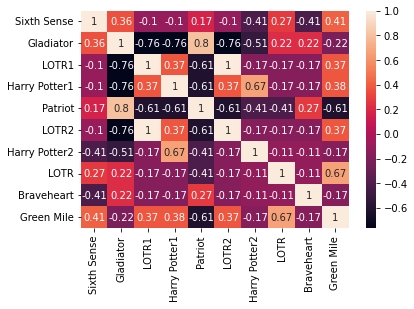

In [ ]:
import seaborn as sns
sns.heatmap(movie_2,annot=True)